In [1]:
#Task 1: Iris Flower Classification 
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
#Load the Dataset
iris = pd.read_csv(r"C:\Users\NIC\Desktop\DataScience\CodeAlpha\Iris.csv")

#Drop the id column (not useful for prediction)
iris.drop("Id", axis=1, inplace=True)

#Show first 5 rows
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#Exploratory Data Analysis (EDA)
print("Dataset Info:")
iris.info()

print("\nStatistical Summary:")
iris.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Statistical Summary:


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
print("\nClass Distribution:")
iris['Species'].value_counts()


Class Distribution:


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

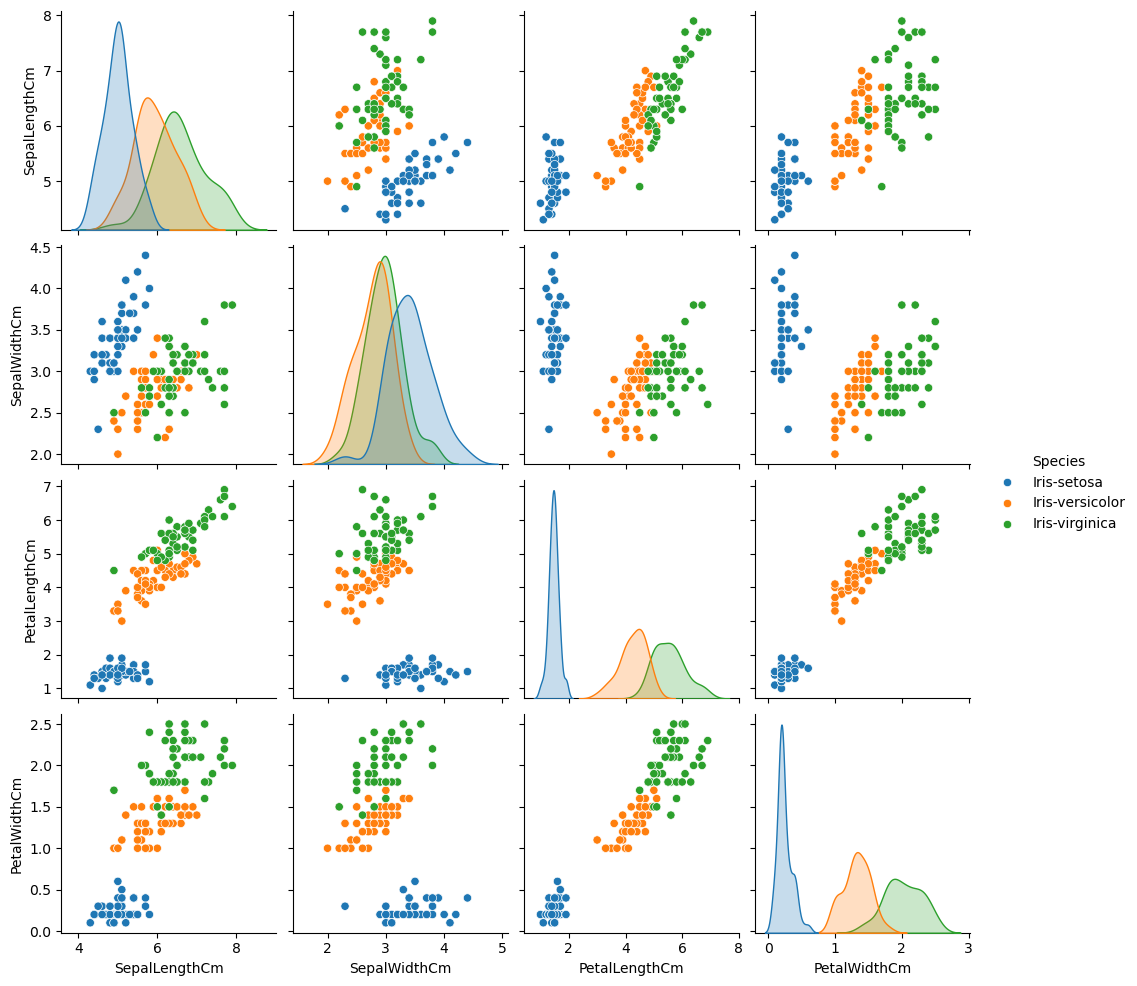

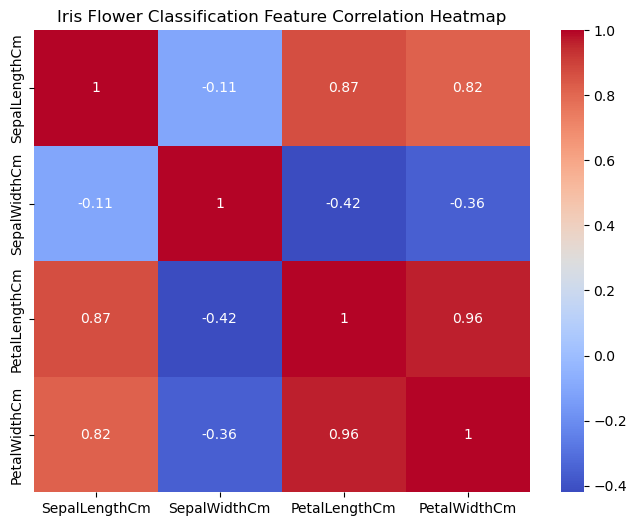

In [5]:
#Pairplot to visualize feature relationships 
sns.pairplot(iris, hue="Species")
plt.show()

#Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(iris.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")  #Convert string to float
plt.title("Iris Flower Classification Feature Correlation Heatmap")
plt.show()

In [6]:
#Separate features and target
X = iris.drop("Species", axis=1)
y = iris["Species"]

#Encode target labels (Setosa, Versicolor, Virginica -> 0,1,2)
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
#Model Training
#Model1: Logistic Regression
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)

#Model2: K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

#Model3: Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

#Model4: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

#Model5: Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', probability=True) #Linear kernel for simplicity
svm_model.fit(X_train, y_train)

svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

                 Model  Accuracy
0  Logistic Regression       1.0
1                  KNN       1.0
2        Decision Tree       1.0
3        Random Forest       1.0
4                  SVM       1.0


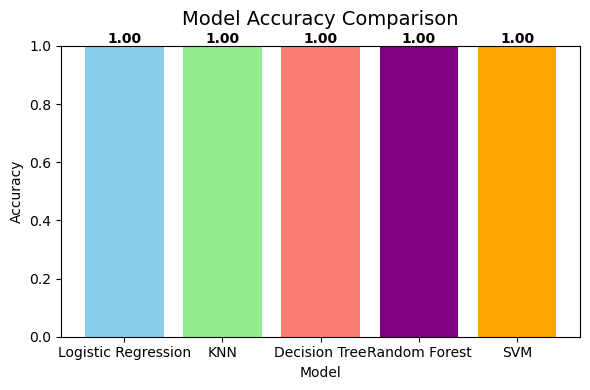

In [9]:
#Accuracy Comparison
results = pd.DataFrame({
    "Model":["Logistic Regression", "KNN", "Decision Tree", "Random Forest", "SVM"],
    "Accuracy": [log_accuracy, 
                 knn_accuracy, 
                 dt_accuracy, 
                 rf_accuracy, 
                 svm_accuracy]
})
results = results.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print(results)

#Model Accuracy Comparison 
plt.figure(figsize=(6,4))
plt.bar(results["Model"], results["Accuracy"], color=["skyblue", "lightgreen", "salmon","purple","orange"])
plt.ylim(0, 1)  # Accuracy goes from 0 to 1
plt.title("Model Accuracy Comparison", pad=15, fontsize=14)
plt.ylabel("Accuracy")
plt.xlabel("Model")
for i, v in enumerate(results["Accuracy"]): #enumerate gives both the index i(position on x-axis) and the value v (the accuracy itself)
    plt.text(i, v+0.01, f"{v:.2f}", ha='center', fontweight='bold')  # show values on top
plt.tight_layout()
plt.show()

---Logistic Regression---


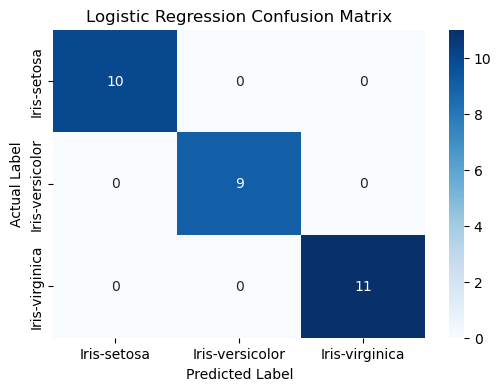

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



---KNN---


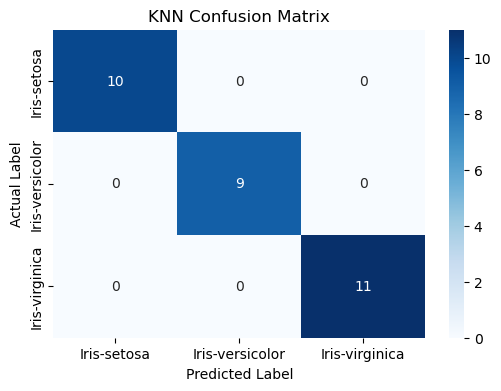

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



---Decision Tree---


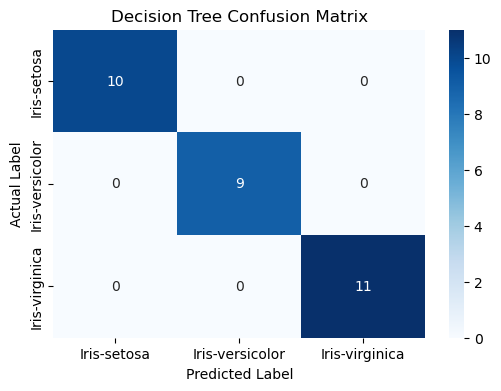

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



---Random Forest---


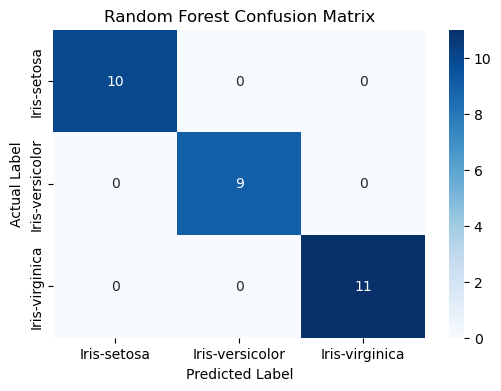

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



---SVM---


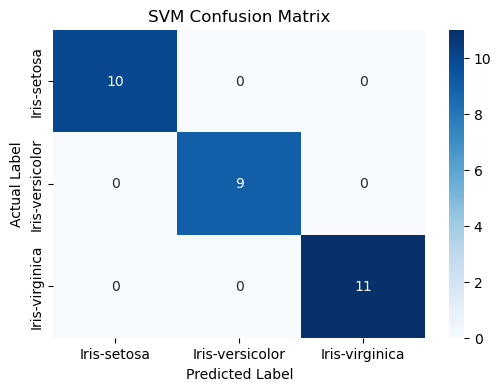

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30





In [10]:
#Confusion Matrix & Classification Report
models = {
    "Logistic Regression": log_pred,
    "KNN": knn_pred,
    "Decision Tree": dt_pred,
    "Random Forest": rf_pred,
    "SVM": svm_pred
}
for name, pred in models.items():
    print(f"---{name}---")
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"{name} Confusion Matrix")
    plt.show()
    
    print("Classification Report:")
    print(classification_report(y_test, pred, target_names=le.classes_))
    print("\n")

In [11]:
#User Input Prediction
#Choosing the best model (here assuming Random Forest is best)
best_model = rf_model

sepal_length = float(input("Enter Sepal Length: "))
sepal_width = float(input("Enter Sepal Width: "))
petal_length = float(input("Enter Petal Length: "))
petal_width = float(input("Enter Petal Width: "))

user_flower = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]], columns=X.columns)

result = best_model.predict(user_flower)

print("Flower Species:", le.inverse_transform(result)[0])

Enter Sepal Length:  5.1
Enter Sepal Width:  3.5
Enter Petal Length:  1.4
Enter Petal Width:  0.2


Flower Species: Iris-setosa
